# Max Disk Mass Over Time (Wyatt et al. 2007)
The collisional timescale of a planetesimal disk $\tau$ is (e.g. Wyatt et al. (2007), Lohne et al. (2007)): $$M_{disk,tot}(t) = M_{disk,tot}(0)/[1+t/\tau(0)]$$
For $t \gg \tau(0)$ the above equation becomes:$$M_{disk,tot}(t) = \tilde{\tau}(0)/t$$
where $\tilde{\tau}(0) = \tau(0)/M_{disk,tot}(0)$. Thus, *the total disk mass at time $t$ is independent of the initial disk mass*. This stems from the fact that disks that are e.g. twice as massive also decay twice as fast. Following Wyatt et al. (2007), assuming a collisional equilibrium $$n(D) = KD^{2-3q}$$ where $n$ is the number of objects with diameter $D$ (in km), $K$ is a constant, and $q = 11/6$ for an infinite collisional cascade (Dohnanyi, 1969), we can derive the maximum planetesimal disk mass as a function of time and distance from the star. This relationship is assumed to hold for the largest planetesimal in the disk of diameter $D_c$ down to the blowout size (by radiation pressure). If $5/3<q<2$ then most of the mass is in the largest planetesimals (Wyatt et al., 2007).  

The maximum mass (units of Earth mass), $M_{max}$, in a planetesimal belt is:  
$$M_{max} = 1.4x10^{-9} r^{13/3}(dr/r)D_cQ_D^{*5/6}e^{-5/3}M_*^{-4/3}t^{-1}_{age}$$
where:  
$r$ = radial distance of planetesimal belt (AU).  
$dr$ = width of the planetesimal belt.  
$Q_D^*$ = specific incident energy required to catastrophically destroy a particle (J/kg).  
$e$ = mean eccentricity of the planetesimals in the disk, valid for a Rayleigh distribution.  
$M_*$ = Stellar mass.  
$t_{age}$ = age of the planetesimal disk (Myr).  

Here we have also assumed the ratio of the relative velocity of collisions to the Keplerian velocity ($v_{rel}/v_{kep}$) is equal to $f(e,I) = \sqrt{1.25e^2 + I^2}$ where $I$ is the inclination, $e \sim I$, $q = 11/6$, and $\rho = 2700 \rm{kgm^{-3}}$. One interesting consequence of this equation is that the maximum mass is independent of initial disk mass.  

**Important**: When the protoplanetary disk is present eccentricities and inclinations are (presumably) damped and so collisions are likely constructive vs. destructive, and not in a collisional cascade equilibrium as is assumed above (Wyatt, private communication). As the gas disk disperses and the planetesimal disk heats up, the collisional cascade is ignited, and this marks the "t=0" point, i.e. from the ignition of the collisional cascade.

Full the details are in Wyatt et al. (2007) - http://adsabs.harvard.edu/abs/2007ApJ...658..569W.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
def Mmax(r,dr,Qd,e,D,Msun,t): #this is the max mass expected in Earth masses
    return 1.4e-9*r**(13./3.)*(dr/r)*D*Qd**(5./6.)*e**(-5./3.)*Msun**(-4./3.)/t

def fmax(r,dr,Qd,e,D,Msun,t,L): #this is the infared emission expected normalized by Solar value
    return 0.58e-9*r**(7./3.)*(dr/r)*D**(0.5)*Qd**(5./6.)*e**(-5./3.)*Msun**(-5./6.)*L**(-0.5)/t

In [12]:
r = 0.4       #centre of planetesimal disk (AU)
dr = 0.2      #width of planetesimal disk (AU)
Qd = 200.     #J/kg, Benz & Asphaug (1999) found Qd = 2e5J/kg for Moon sized bodies.
e = 0.01       #mean of Rayleigh eccentricity distribution
D = 1737.     #Largest body in the initial disk, moon sized = 1737 km
Msun = 1         #M_sun
t = 0.1        #Myr since dispersal of gas disk

In [13]:
Mmax(r,dr,Qd,e,D,Msun,t)

0.040864809992340406

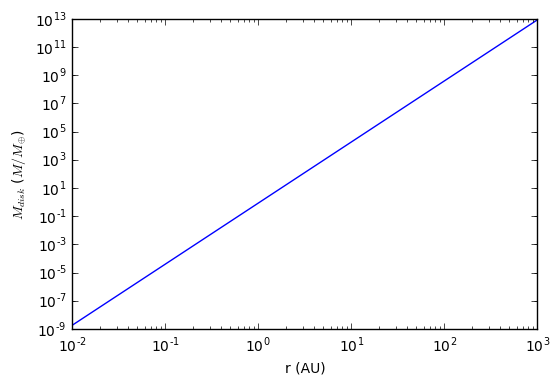

In [14]:
#Mmax vs. r
var = np.logspace(-2,3,100)
plt.plot(var,Mmax(var,dr*var,Qd,e,D,Msun,t))
plt.yscale('log')
plt.xscale('log')
plt.xlabel('r (AU)')
plt.ylabel(r'$M_{disk}$ ($M/M_{\oplus}$)')

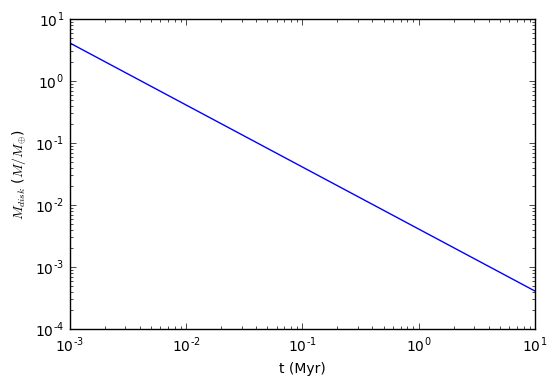

In [67]:
#Mmax vs. t
var = np.logspace(-3,1,100)
plt.plot(var,Mmax(r,dr,Qd,e,D,Msun,var))
plt.yscale('log')
plt.xscale('log')
plt.xlabel('t (Myr)')
plt.ylabel(r'$M_{disk}$ ($M/M_{\oplus}$)')

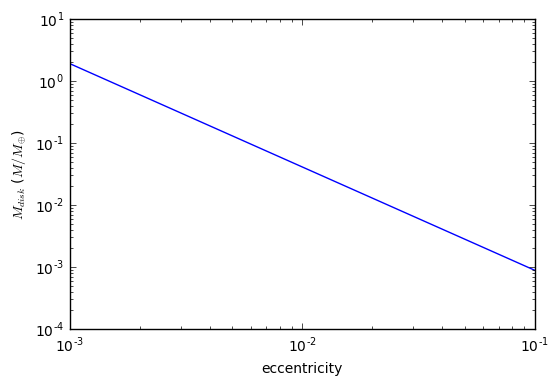

In [15]:
#Mmax vs. e - higher e = more destructive collisions into dust which gets blown away
var = np.logspace(-3,-1,100)
plt.plot(var,Mmax(r,dr,Qd,var,D,Msun,t))
plt.yscale('log')
plt.xscale('log')
plt.xlabel('eccentricity')
plt.ylabel(r'$M_{disk}$ ($M/M_{\oplus}$)')

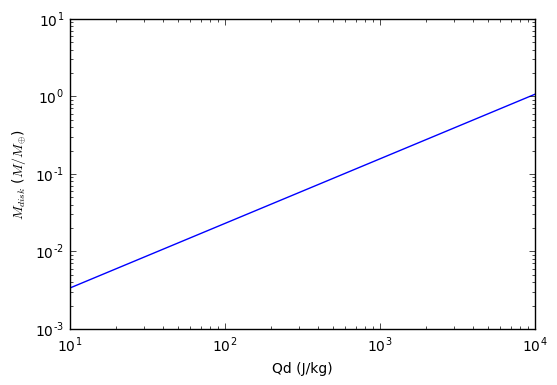

In [65]:
#Mmax vs. Qd
var = np.logspace(1,4,100)
plt.plot(var,Mmax(r,dr,var,e,D,Msun,t))
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Qd (J/kg)')
plt.ylabel(r'$M_{disk}$ ($M/M_{\oplus}$)')

In [35]:
fmax(r,dr,QD,e_mean,D_c,Msun,t,54)

0.0003987083301926093

# Comparing Lohne vs. Wyatt
Lohne et al. (2007) gives a more detailed description for the collisional timescale of planetesimals $\tau$ than Wyatt (2007) according to: $$M_{disk,tot}(t) = M_{disk,tot}(0)/[1+t/\tau(0)]$$  
Assuming that $t \gg \tau(0)$, and realizing that $\tau(0)$ contains a factor of $1/M_{disk,tot}(0)$, the above equation becomes:$$M_{disk,tot}(t) = \tilde{\tau}(0)/t$$
where $\tilde{\tau}(0) = \tau(0)/M_{disk,tot}(0)$. Thus, as mentioned above, the total disk mass at time $t$ is independent of the initial disk mass. We already have our equation for disk mass vs. time in the Wyatt model. Below is Eq. 34 from Lohne et al. (2007).  

We use the same assumptions for this model as in Wyatt - $e = I$, $\rho = 2700 kg/m^{-3}$, $q=11/6$. We also assume $s = s_{max}$. The equation below looks **very** similar to Wyatts.

In [5]:
def Mmax_Lohne(r,dr,Qd,e,D,t):
    smax_div_smin = 3
    fac = 15./6.*np.log(smax_div_smin)
    return fac*r**(10./3.)*dr*Qd**(5./6.)*e**(-5./3.)/t